In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')
import pvlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
forecast_weather = pd.read_csv('../../Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('../../Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [3]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).sum().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

In [5]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

In [6]:
reg = real_weather[real_weather['지점명'] =='순천']

In [7]:
eda_weather = reg.drop(['지점', '지점명'], axis=1)
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

In [8]:
eda_weather.set_index('일시', inplace=True)

In [9]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [10]:
solar_2.date = pd.to_datetime(solar_2.date)

In [11]:
solar_2.set_index('date', inplace=True)

In [12]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [13]:
y = solar_2.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [14]:
y.drop('hour', axis=1 , inplace=True)

In [15]:
x.drop(['위도','경도'], axis=1, inplace=True)

In [16]:
total = pd.concat([x, y], axis = 1)

In [17]:
total.interpolate()

,기온,풍속,풍향,습도,강수량,hour,month,year,value
2021-01-01 00:00:00,-2.3,3.8,290.0,81.0,0.0,0.0,1.0,2021.0,0.0
2021-01-01 01:00:00,-3.1,3.3,290.0,71.0,0.0,1.0,1.0,2021.0,0.0
2021-01-01 02:00:00,-3.7,3.6,290.0,73.0,0.0,2.0,1.0,2021.0,0.0
2021-01-01 03:00:00,-4.2,3.1,270.0,76.0,0.0,3.0,1.0,2021.0,0.0
2021-01-01 04:00:00,-4.2,2.4,270.0,76.0,0.0,4.0,1.0,2021.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,13.9,3.0,290.0,70.0,0.0,19.0,4.0,2022.0,144.0
2022-04-30 20:00:00,12.9,2.2,290.0,78.0,0.0,20.0,4.0,2022.0,0.0
2022-04-30 21:00:00,12.5,2.5,290.0,78.0,0.0,21.0,4.0,2022.0,0.0
2022-04-30 22:00:00,11.9,2.7,290.0,82.0,0.0,22.0,4.0,2022.0,0.0


In [18]:
complete_date_rng = pd.date_range(start='2021-01-01', end='2022-04-30', freq='H')

# 누락된 시간 찾기
missing_dates = complete_date_rng.difference(total.index)

In [19]:
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [20]:
total_eda = total[(total.index>='2021-09-28') | (total.index <= '2021-09-22')]

In [21]:
total_eda_2 = total_eda[(total_eda.index <= '2022-01-14') | (total_eda.index >= '2022-01-17')]

In [22]:
date_counts = total_eda_2.resample('D').count()

In [23]:
date_counts

,기온,풍속,풍향,습도,강수량,hour,month,year,value
2021-01-01,24,24,24,24,24,24,24,24,24
2021-01-02,24,24,24,24,24,24,24,24,24
2021-01-03,24,24,24,24,24,24,24,24,24
2021-01-04,24,24,24,24,24,24,24,24,24
2021-01-05,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...
2022-04-26,24,24,24,24,24,24,24,24,24
2022-04-27,24,24,24,24,24,24,24,24,24
2022-04-28,24,24,24,24,24,24,24,24,24
2022-04-29,24,24,24,24,24,24,24,24,24


In [24]:
extra_hourly_data = date_counts[date_counts['month'] < 24]

extra_hourly_data

,기온,풍속,풍향,습도,강수량,hour,month,year,value
2021-09-22,1,1,1,1,1,1,1,1,1
2021-09-23,0,0,0,0,0,0,0,0,0
2021-09-24,0,0,0,0,0,0,0,0,0
2021-09-25,0,0,0,0,0,0,0,0,0
2021-09-26,0,0,0,0,0,0,0,0,0
2021-09-27,0,0,0,0,0,0,0,0,0
2022-01-01,23,23,23,23,23,23,23,23,24
2022-01-14,1,1,1,1,1,1,1,1,1
2022-01-15,0,0,0,0,0,0,0,0,0
2022-01-16,0,0,0,0,0,0,0,0,0


In [25]:
total_eda_2 = total_eda_2[total_eda_2.index != '2022-01-14']
total_eda_2 = total_eda_2[total_eda_2.index != '2021-09-22']

In [26]:
total_eda_2.interpolate(inplace=True, method='linear')

In [27]:
total_eda_2

,기온,풍속,풍향,습도,강수량,hour,month,year,value
2021-01-01 00:00:00,-2.3,3.8,290.0,81.0,0.0,0.0,1.0,2021.0,0.0
2021-01-01 01:00:00,-3.1,3.3,290.0,71.0,0.0,1.0,1.0,2021.0,0.0
2021-01-01 02:00:00,-3.7,3.6,290.0,73.0,0.0,2.0,1.0,2021.0,0.0
2021-01-01 03:00:00,-4.2,3.1,270.0,76.0,0.0,3.0,1.0,2021.0,0.0
2021-01-01 04:00:00,-4.2,2.4,270.0,76.0,0.0,4.0,1.0,2021.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,13.9,3.0,290.0,70.0,0.0,19.0,4.0,2022.0,144.0
2022-04-30 20:00:00,12.9,2.2,290.0,78.0,0.0,20.0,4.0,2022.0,0.0
2022-04-30 21:00:00,12.5,2.5,290.0,78.0,0.0,21.0,4.0,2022.0,0.0
2022-04-30 22:00:00,11.9,2.7,290.0,82.0,0.0,22.0,4.0,2022.0,0.0


In [28]:
def clear_sky_model_pred(longitude, latitude, capacity, weather):
    """
    input :
        longitude : 경도
        latitude : 위도
        capacity : 용량(단위 : w)
        weather : 날씨 데이터 (index가 날짜인 데이터)
    output :
        cs : ghi, dni, dhi
        generation : 발전량
    """
    location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')
    start_date = weather.index.min()
    end_date = weather.index.max()

    # 시간대가 Asia/Seoul로 설정되어 있는지 확인하고, 아니라면 설정한다.
    if weather.index.tz is None or weather.index.tz.zone != 'Asia/Seoul':
        weather = weather.tz_localize('Asia/Seoul')

    times = pd.date_range(start=start_date, end=end_date, freq='1H', tz='Asia/Seoul')
    solpos = location.get_solarposition(times=times)
    dni_extra = pvlib.irradiance.get_extra_radiation(times)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(location.altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
    tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

    solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
    cs = location.get_clearsky(times, model='simplified_solis')
    
    # cs의 시간대를 None으로 설정
    cs = cs.tz_localize(None)

    system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                    module_parameters={'pdc0': capacity, 'gamma_pdc': -0.004}, 
                                    inverter_parameters={'pdc0': capacity},
                                    modules_per_string=1, strings_per_inverter=1,
                                    temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
    mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

    mc.run_model(pd.concat([solis_clearsky, weather], axis=1))

    return cs, pd.DataFrame(mc.results.ac)

In [29]:
latitude, longitude = reg[['위도', '경도']].iloc[0]

In [30]:
weather_input = total_eda_2.drop(['month', 'year', 'hour', 'value'], axis=1)

In [31]:
radi, _ = clear_sky_model_pred(longitude, latitude, 1000, weather_input)

In [33]:
total_df = pd.concat([total_eda_2, radi], axis=1)

In [34]:
total_df.interpolate(inplace=True, method='linear')

In [35]:
y = total_df.value / 5
x = total_df.drop('value', axis=1)

In [46]:
int(len(x)/24/4)

121

In [136]:
x_train, x_valid, x_test = x.iloc[:int(len(x)*0.8/24*0.8)*24], x.iloc[int(len(x)*0.8/24*0.8)*24: int(len(x)*0.8/24)*24], x.iloc[int(len(x)*0.8/24)*24:]
y_train, y_valid, y_test = y.iloc[:int(len(x)*0.8/24*0.8)*24], y.iloc[int(len(x)*0.8/24*0.8)*24: int(len(x)*0.8/24)*24], y.iloc[int(len(x)*0.8/24)*24:]

In [137]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [138]:
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()

In [139]:
sc_x.fit(x_train)

x_train = sc_x.transform(x_train)
x_valid = sc_x.transform(x_valid)
x_test = sc_x.transform(x_test)

In [140]:
sc_y.fit(y_train.values.reshape(-1,1))

y_train = sc_y.transform(y_train.values.reshape(-1,1))
y_train = y_train

y_valid = sc_y.transform(y_valid.values.reshape(-1,1))
y_test = sc_y.transform(y_test.values.reshape(-1,1))

In [141]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(7440, 11)
(1872, 11)
(2328, 11)
(7440, 1)
(1872, 1)
(2328, 1)


----
# Model Train

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [145]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [146]:
dt = DecisionTreeRegressor(max_depth=5)

In [147]:
params = {
    'n_estimators' : [5,50,100],
    'max_depth': [3,5,7],
    'min_samples_leaf':[4,6],
    'min_samples_split':[4,8,16]
}

In [148]:
lg_params = {
    'n_estimators' : [5,10,15],
    'max_depth': [3,5,8],
    'learning_rate' : [0.01, 0.1, 0.3],
    'num_leaves' : [16, 32, 64]
}

In [149]:
rf = RandomForestRegressor()
lg = LGBMRegressor(n_jobs = -1)

In [150]:
grid_cv_rf = GridSearchCV(rf, param_grid=params,
                      cv=3, n_jobs=2)
grid_cv_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 8, 16],
                         'n_estimators': [5, 50, 100]})

In [313]:
grid_cv_rf.best_params_

{'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [151]:
grid_cv_lg = GridSearchCV(lg, param_grid=lg_params,
                      cv=3, n_jobs=2)
grid_cv_lg.fit(x_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 7440, number of used features: 10
[LightGBM] [Info] Start training from score 0.178396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=3, estimator=LGBMRegressor(n_jobs=-1), n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 8], 'n_estimators': [5, 10, 15],
                         'num_leaves': [16, 32, 64]})

In [312]:
grid_cv_lg.best_estimator_

LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=15, n_jobs=-1,
              num_leaves=16)

----

In [152]:
import tensorflow as tf

In [153]:
from tensorflow.keras import layers, models

In [154]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))


In [155]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [156]:
dnn_his = model.fit(x_train, y_train, epochs=240, batch_size=24, verbose=0)

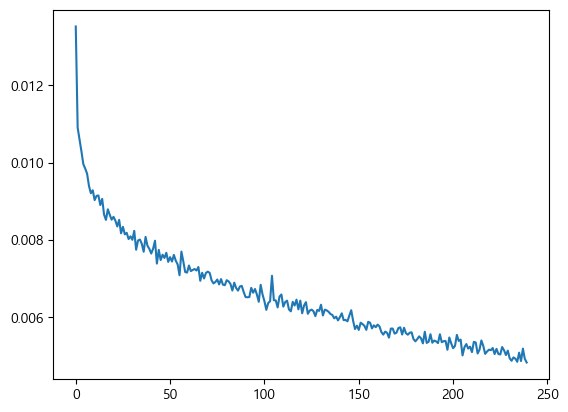

In [164]:
plt.plot(dnn_his.history['loss'])

In [158]:
ann_pred = model.predict(x_test)

73/73 [==============================] - 0s 956us/step


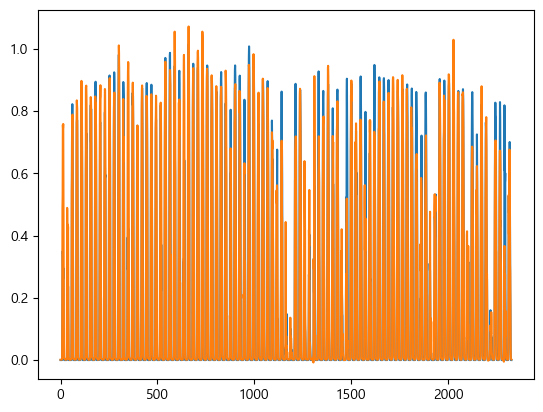

In [159]:
plt.plot(y_test)
plt.plot(ann_pred)

In [160]:
# import LSTM
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

In [161]:
# LSTM 모델 정의
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(x_train.shape[1],1), return_sequences=True))
lstm_model.add(LSTM(128))
lstm_model.add(layers.Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [162]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 115841 (452.50 KB)
Trainable params: 115841 (452.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [166]:
lstm_his = lstm_model.fit(x_train.reshape(-1,11,1), y_train, epochs=240, batch_size=24, verbose=0)

In [168]:
lstm_pred = lstm_model.predict(x_test.reshape(-1,11,1))

73/73 [==============================] - 1s 2ms/step


-----
# Model Prediction

In [170]:
from tqdm import tqdm

In [175]:
model_list = [grid_cv_rf, grid_cv_lg, model, lstm_model]

In [196]:
train_pred = []
for i,k in enumerate(model_list):
    if i == 3:
        pred = k.predict(x_train.reshape(-1,11,1))
        pred = pred.astype('float64').flatten()
        train_pred.append(pred)
    elif i == 2:
        pred = k.predict(x_train)
        pred = pred.astype('float64').flatten()
        train_pred.append(pred)

    else:
        train_pred.append(k.predict(x_train))

233/233 [==============================] - 1s 2ms/step


In [307]:
import xgboost
from sklearn.linear_model import LinearRegression

In [314]:
xgb = xgboost.XGBRegressor(n_estimators=100, max_depth = 7, max_leaves = 6, learning_rate=0.01, n_jobs=-1)

In [315]:
lr = LinearRegression()

In [316]:
xgb.fit(np.array(train_pred).reshape(-1,4), y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=6,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [317]:
lr.fit(np.array(train_pred).reshape(-1,4), y_train)

LinearRegression()

----
# Validation test

In [318]:
valid_pred = []
for i,k in enumerate(model_list):
    if i == 3:
        pred = k.predict(x_valid.reshape(-1,11,1))
        pred = pred.astype('float64').flatten()
        valid_pred.append(pred)
    elif i == 2:
        pred = k.predict(x_valid)
        pred = pred.astype('float64').flatten()
        valid_pred.append(pred)

    else:
        valid_pred.append(k.predict(x_valid))

 1/59 [..............................] - ETA: 0s

59/59 [==============================] - 0s 3ms/step


In [319]:
xgb_valid_pred = xgb.predict(np.array(valid_pred).reshape(-1,4))

In [320]:
lg_valid_pred = lr.predict(np.array(valid_pred).reshape(-1,4))

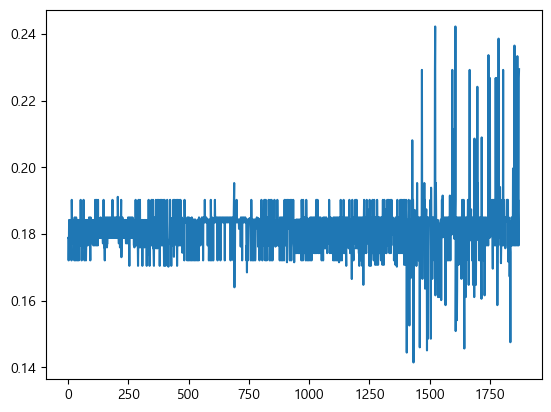

In [321]:
plt.plot(xgb_valid_pred)

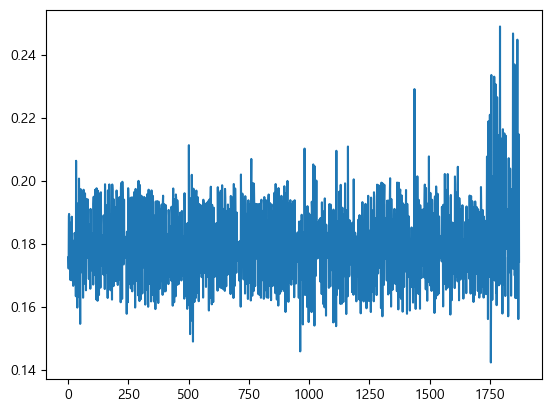

In [322]:
plt.plot(lg_valid_pred)

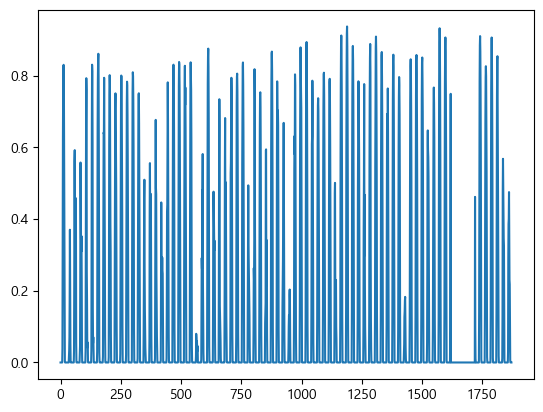

In [323]:
plt.plot(y_valid)

In [300]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [324]:
print('Meta model error')
print('mae error : ', mean_absolute_error(y_valid, xgb_valid_pred))
print('mse error : ', mean_squared_error(y_valid, xgb_valid_pred))

print('=============================')

print('Base model error')
print('mae error(rf) : ', mean_absolute_error(y_valid, valid_pred[0]))
print('mse error(rf) : ', mean_squared_error(y_valid, valid_pred[0]))

print('=============================')

print('mae error(lg) : ', mean_absolute_error(y_valid, valid_pred[1]))
print('mse error(lg) : ', mean_squared_error(y_valid, valid_pred[1]))

print('=============================')

print('mae error(ann) : ', mean_absolute_error(y_valid, valid_pred[2]))
print('mse error(ann) : ', mean_squared_error(y_valid, valid_pred[2]))

print('=============================')

print('mae error(lstm) : ', mean_absolute_error(y_valid, valid_pred[3]))
print('mse error(lstm) : ', mean_squared_error(y_valid, valid_pred[3]))

Meta model error
mae error :  0.22847190796249078
mse error :  0.07464438070752749
Base model error
mae error(rf) :  0.0485154009443633
mse error(rf) :  0.01369827885328773
mae error(lg) :  0.0525705549047744
mse error(lg) :  0.014831326915582282
mae error(ann) :  0.058916127029574994
mse error(ann) :  0.017890246065075898
mae error(lstm) :  0.10860790322068477
mse error(lstm) :  0.033033196602021656


-----
# Fianl pred

In [302]:
test_pred = []
for i,k in enumerate(model_list):
    if i == 3:
        pred = k.predict(x_test.reshape(-1,11,1))
        pred = pred.astype('float64').flatten()
        test_pred.append(pred)
    elif i == 2:
        pred = k.predict(x_test)
        pred = pred.astype('float64').flatten()
        test_pred.append(pred)

    else:
        test_pred.append(k.predict(x_test))

 1/73 [..............................] - ETA: 1s

73/73 [==============================] - 0s 3ms/step


In [303]:
test_pred

[array([6.36490803e-06, 6.36490803e-06, 6.36490803e-06, ...,
        3.09702526e-04, 3.06106370e-04, 3.06106370e-04]),
 array([0.00217344, 0.00217344, 0.00217344, ..., 0.00134266, 0.00134266,
        0.00285627]),
 array([0.0011638 , 0.0010065 , 0.00107794, ..., 0.00403498, 0.00307845,
        0.00190978]),
 array([ 0.17668505,  0.335987  ,  0.34264979, ..., -0.02271868,
        -0.08819524, -0.00970436])]

In [304]:
xgb_test_pred = xgb.predict(np.array(test_pred).reshape(-1,4))

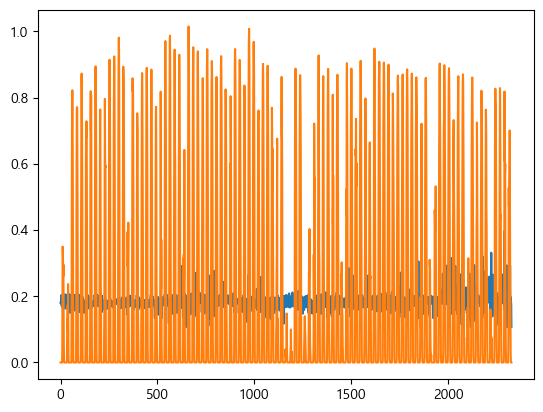

In [305]:
plt.plot(xgb_test_pred)
plt.plot(y_test)

In [306]:
print('Meta model error')
print('mae error : ', mean_absolute_error(y_test, xgb_test_pred))
print('mse error : ', mean_squared_error(y_test, xgb_test_pred))

print('=============================')

print('Base model error')
print('mae error(rf) : ', mean_absolute_error(y_test, test_pred[0]))
print('mse error(rf) : ', mean_squared_error(y_test, test_pred[0]))

print('=============================')

print('mae error(lg) : ', mean_absolute_error(y_test, test_pred[1]))
print('mse error(lg) : ', mean_squared_error(y_test, test_pred[1]))

print('=============================')

print('mae error(ann) : ', mean_absolute_error(y_test, test_pred[2]))
print('mse error(ann) : ', mean_squared_error(y_test, test_pred[2]))

print('=============================')

print('mae error(lstm) : ', mean_absolute_error(y_test, test_pred[3]))
print('mse error(lstm) : ', mean_squared_error(y_test, test_pred[3]))

Meta model error
mae error :  0.24993309267763697
mse error :  0.09499650773922438
Base model error
mae error(rf) :  0.04505035124617993
mse error(rf) :  0.008868383433902892
mae error(lg) :  0.04619775655925342
mse error(lg) :  0.008796837261287683
mae error(ann) :  0.046362037815255705
mse error(ann) :  0.010229537738653469
mae error(lstm) :  0.20622363491765078
mse error(lstm) :  0.0640837631015532
